# Aliasing in the Time- and Frequency  Domains

Original signal $x(t)$ and signal $x[n]$, sampled at $t[n]= nT_s$, $n= 0, 1, 2, \ldots$, where $T_s$ is the sample interval and $f_s = 1/T_s$ is the sample rate. 
\begin{align}
  x(t) &= \cos(2 \pi f_0 t + \phi) &
  x[n] &=  \cos(2 \pi f_0 n T_s) = \cos(\hat\omega_0 n + \phi)  & \hat\omega_0 &= 2 \pi f_0 T_s = 2 \pi \frac{f_0}{f_s}
\end{align}
The sample ponts $x[n]$ will be the same for all normalised frequencies $\hat\omega$ fulfilling
\begin{align}
  \hat\omega &= \hat\omega_0 + 2 \pi n  & &\text{ or } & \hat\omega &=-\hat\omega_0 + 2n \pi & n &= 0, \pm1, \pm2, \pm3, \ldots
\end{align}
When this is converted to linear frequencies, we get that all frequencies $f_a$ will give the same values in the sample points if 
\begin{align}
  f_a &= f_0 + n f_s  & & \text{ or } & f_a &= -f_0 + n f_s 
\end{align}
After the signal has been sampled, there is no way to find out which of the alias frequencies $f_a$ corresponds to the original frequency $f_0$.

The phenomenon is illustrated in the interactive widget below. 

The orange curves represent the original signal. In the frequency plots, all the alias frequencies are shown in blue, while the unique region where $-\tfrac12 f_s \le f \le \tfrac12 f_s$ is illustrated with a green box. One negative and one positive alias frequency will always fall within these limits.

When the signal is reconstructed, the lowest possible frequency is selected. This is the frequency pair that has $|f_a| \le \tfrac12 f_s$, the the pair inside the green box.
This will be the same as the original frequency $f_0$ when $f_0 \le \tfrac12 f_s$. If $f_0$ it is outside this region, the signal will be reconstructed with the alias frequency within the region. 




In [3]:
"""Illustrate aliasing in the time- and frequency domains.

Use Matplotlib backend that allows interactive operation
"""

from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors


# %%
class FrequencyAliasSignal():
    """Demonstation of aliasing in the time- and frequency domains.

    All calculations and plotting routines are contained in this class
    """

    def __init__(self, f=5, phase=0, fs=20):
        """Initialise signal."""
        self.f = f                          # Original frequency
        self.phase = 0.2                    # Phase [radians]
        self.fs = fs                        # Sample rate
        self.n_alias = np.arange(-10, 10)   # Alias frequency number
        self.n_t = 1000                     # Number of point in time vectors
        self.t_max = 10/self.fs               # Length of time axis
        self.display = 'Both'
        self.ax_time, self.ax_freq = self.initialise_graphs()
        self.color = self.initialise_colors()

    def _f_alias(self):
        """Find aliases from positive frequency."""
        return self.f + self.n_alias * self.fs

    def f_all(self):
        """Find the 20 lowest unique aliasing frequencies."""
        fp = self._f_alias()
        fn = -fp      # Add negative aliases
        return np.sort(np.append(fn, fp))

    def fa(self):
        """Principal alias frequency."""
        na = np.argmin(abs(self._f_alias()))   # Index of principal alias
        self._f_alias()[na]                    # Principal alias, signed

        return self._f_alias()[na]

    def ti(self):
        """Original time vector."""
        return np.arange(0, self.t_max, 1/(100*self.f))

    def dts(self):
        """Sample time."""
        return 1/self.fs

    def ts(self):
        """Get sampled time vector, including entire time vector."""
        return np.arange(0, self.t_max+self.dts()/2, self.dts())

    def original(self):
        """Original signal."""
        return np.cos(2 * pi * self.f * self.ti() + self.phase)

    def sampled(self):
        """Calculate sampled signal."""
        return np.cos(2*pi * self.f * self.ts() + self.phase)

    def reconstructed(self):
        """Reconstructed signal."""
        return np.cos(2 * pi * self.fa() * self.ti() + self.phase)

    def initialise_colors(self):
        """Create consistens set of colors for the plots.

        Using Matplotlib's 'Tableau' palette
        """
        color = {}
        color["original"] = mcolors.TABLEAU_COLORS['tab:orange']
        color["sampled"] = mcolors.TABLEAU_COLORS['tab:blue']
        color["reconstructed"] = mcolors.TABLEAU_COLORS['tab:green']
        color["aliased"] = mcolors.TABLEAU_COLORS['tab:red']
        color["nyquist"] = mcolors.TABLEAU_COLORS['tab:green']

        return color

    def initialise_graphs(self):
        """Initialise graphs for signals and spectra."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 6],
                         constrained_layout=True,
                         num="Aliasing Demo")

        n_plots = 3
        ax_time = [fig.add_subplot(2, n_plots, k+1) for k in range(n_plots)]
        ax_freq = [fig.add_subplot(2, n_plots, k+1+n_plots)
                   for k in range(n_plots)]

        fs_scale = 2*self.fs
        for k in range(n_plots):
            ax_time[k].set(xlim=(0, 2/self.f),
                           ylim=(-1.1, 1.1),
                           xlabel="Time [s]")

            ax_freq[k].set(xlim=(-fs_scale, fs_scale),
                           ylim=(0, 1.1),
                           xlabel="Frequency [Hz]")

        return ax_time, ax_freq

    def plot(self):
        """Plot all signals and spectra."""
        # Clear old lines
        for ax in self.ax_time + self.ax_freq:
            for art in list(ax.lines):
                art.remove()
            for art in list(ax.collections):
                art.remove()
            for art in list(ax.patches):
                art.remove()

        # Plot time traces
        display_original = self.display.lower().startswith(("orig", "both"))
        display_reconstructed = self.display.lower().startswith(("recon", "both"))

        self.ax_time[0].plot(self.ti(), self.original(),
                             "-",
                             color=self.color["original"])
        self.ax_time[1].stem(self.ts(), self.sampled(),
                             linefmt=self.color["sampled"])

        if  display_original:
            self.ax_time[1].plot(self.ti(), self.original(),
                                 linestyle="--",
                                 color=self.color["original"])
        if display_reconstructed:
            self.ax_time[1].plot(self.ti(), self.reconstructed(),
                                 linestyle="--",
                                 color=self.color["reconstructed"])

        self.ax_time[2].plot(self.ti(), self.reconstructed(),
                             linestyle="-",
                             color=self.color["reconstructed"])

        # Add titles with values
        self.ax_time[0].set_title(f"Frequency = {self.f:.1f} Hz")
        self.ax_time[1].set_title(f"Sampling at {self.fs:.1f} samples/s")
        self.ax_time[2].set_title( f"Reconstructed frequency = {abs(self.fa()):.1f} Hz")

        # Plot spectra
        self.ax_freq[0].stem([-self.f, self.f], np.ones(2),
                             linefmt=self.color["original"])
        self.ax_freq[1].stem(self.f_all(), np.ones(len(self.f_all())),
                             linefmt=self.color["sampled"])
        self.ax_freq[1].stem([-self.f, self.f], np.ones(2),
                             linefmt=self.color["original"])
        self.ax_freq[2].stem([-self.fa(), self.fa()], np.ones(2),
                             linefmt=self.color["reconstructed"])

        # == Disabled ===
        # Indicate if aliasing occurs
        # aliasing = (self.f > self.fs/2)
        # if aliasing:
        #    nyquistcolor = self.color["aliased"]
        # else:
        #    nyquistcolor = self.color["nyquist"]
        # ===============

        # Make box showing Nyquist limits
        fn = self.fs/2
        for ax in self.ax_freq:
            ax.add_patch(patches.Rectangle((-fn, 0),       # (x,y)
                                           2*fn,           # width
                                           2,              # height
                                           alpha=0.20,     # transparency
                                           color=self.color["nyquist"]))
            ax.plot([-fn, -fn], [0, 2], color=self.color["nyquist"])
            ax.plot([fn, fn], [0, 2], color=self.color["nyquist"])

        return 0



Label(value='Aliasing in the Time and Frequency Domains', style=LabelStyle(font_weight='bold'))

FloatSlider(value=8.0, description='Frequency [Hz]', layout=Layout(width='70%'), max=40.0, min=0.5, readout_fo…

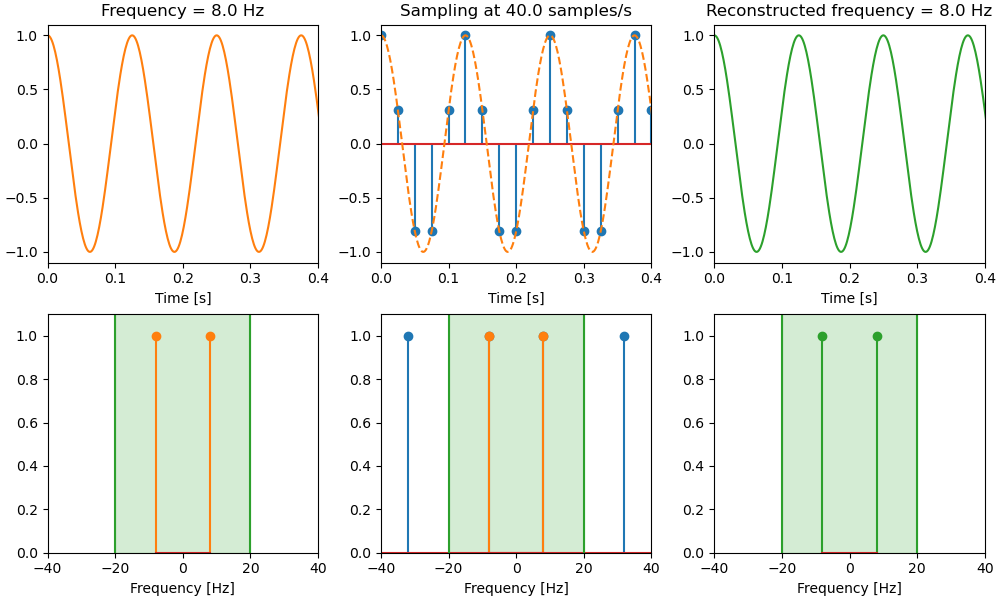

In [4]:
# Load modules for intereactive operation
%matplotlib ipympl
import numpy as np
import ipywidgets as widgets
#import aliasing_demo

#  Function that runs the demo interactively
def run_aliasing_demo(frequency, phase_deg, sample_rate, display):
    """Set values and call plotting function."""
    signal.f = frequency
    signal.fs = sample_rate
    signal.phase = np.radians(phase_deg)
    signal.display = display

    signal.plot()
    return

# Define signal and run demo
signal = FrequencyAliasSignal()

# Define and display widgets
title_widget = widgets.Label("Aliasing in the Time and Frequency Domains", 
                             style=dict(font_weight='bold'))

widget_style = dict(description_width='initial')
phase_widget = widgets.FloatSlider(min=-180, max= 180, value=0, step=5, 
                                 description='Phase [deg]',  
                                 readout_format='.0f',
                                 layout=widgets.Layout(width='40%'), 
                                 style=widget_style)

sample_rate_widget = widgets.FloatText(min=1, max= 100, value=40, step=1, 
                                       description='Sample rate [1/s]',  
                                       readout_format='.1f', 
                                       layout=widgets.Layout(width='15%'), 
                                       style=widget_style)

curvedisplay_widget = widgets.Dropdown(options=['Original', 'Reconstructed', 'Both', 'None'],
                                   value='Original',
                                   description='Display',
                                   layout=widgets.Layout(width='20%'), 
                                   style=widget_style)

frequency_widget = widgets.FloatSlider(min= 0.5, max= 40, value=8, step=0.5, 
                                       description='Frequency [Hz]', 
                                       readout_format='.1f', 
                                       layout=widgets.Layout(width='70%'), 
                                       style=widget_style)

widget_line = widgets.HBox([phase_widget, sample_rate_widget, curvedisplay_widget])

display(title_widget)
display(widget_line)
display(frequency_widget)

# Run demo from widgets
w = widgets.interactive(run_aliasing_demo, frequency=frequency_widget, phase_deg=phase_widget, sample_rate=sample_rate_widget, display=curvedisplay_widget)